In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
proj_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

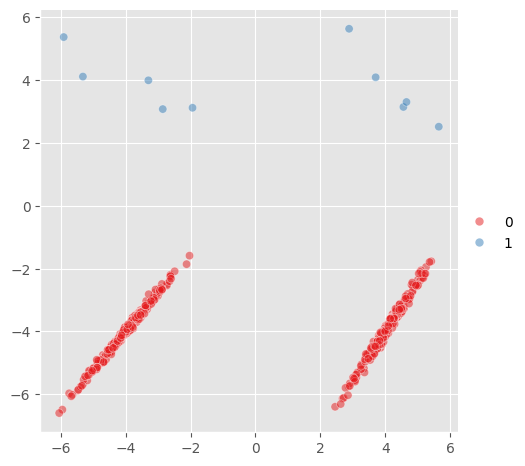

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0,
                           weights=[0.98], flip_y=0,
                           class_sep=4, random_state=42)

plt.style.use('ggplot')
sns.relplot(x=X[:,0],y=X[:,1],hue=y,palette="Set1",alpha=0.5)
plt.show()

In [3]:
indices = np.where(y == 1)[0]
print(f'the idx of outliers are {indices}')

the idx of outliers are [140 142 160 234 235 248 267 324 363 375]


In [3]:
from PyOD_ADGE.models.local_outlier_factor import LocalOutlierFactor
model= LocalOutlierFactor()
model.fit(X)

ModuleNotFoundError: No module named 'PyOD_ADGE'

In [5]:
scores = model.outlier_factor_
scores

array([ 0.99097382,  1.04349507,  1.06177972,  1.05022413,  0.97162852,
        1.04407669,  1.03664442,  1.00109599,  0.98994647,  1.01533226,
        0.99917782,  0.98516803,  1.02795283,  0.99547209,  1.01315029,
        0.96670496,  1.21980218,  1.00489869,  0.9868231 ,  1.05611129,
        1.7358083 ,  0.97248591,  1.02637257,  1.04006945,  1.0028185 ,
        1.02584981,  0.98414039,  1.0644397 ,  0.9860534 ,  1.45391669,
        1.00394081,  1.1914894 ,  1.14372969,  1.09835237,  1.03273553,
        0.9874664 ,  1.30621792,  1.03158643,  0.99510171,  1.02438138,
        1.00172293,  1.0214363 ,  0.98778399,  0.97944413,  0.98733675,
        1.0050803 ,  1.24470886,  1.01628855,  1.02912985,  1.00826679,
        0.99997239,  1.54144806,  0.99483121,  1.00124325,  1.00307109,
        1.02215254,  0.98249683,  1.14758346,  1.0642148 ,  1.01663375,
        1.00575671,  1.04840395,  1.02173149,  1.03818858,  1.08453026,
        1.02530805,  1.00898983,  1.03843642,  0.99001447,  1.00

In [6]:
from sklearn.neighbors import LocalOutlierFactor as LOF
model2= LOF(n_neighbors=20, algorithm='auto', metric='euclidean')
model2.fit(X)

LocalOutlierFactor(metric='euclidean')

In [7]:
scores2=model2.negative_outlier_factor_
scores2

array([ -0.99097382,  -1.04349507,  -1.06177972,  -1.05022413,
        -0.97162852,  -1.04407669,  -1.03664442,  -1.00109599,
        -0.98994647,  -1.01533226,  -0.99917782,  -0.98516803,
        -1.02795283,  -0.99547209,  -1.01315029,  -0.96670496,
        -1.21980218,  -1.00489869,  -0.9868231 ,  -1.05611129,
        -1.7358083 ,  -0.97248591,  -1.02637257,  -1.04006945,
        -1.0028185 ,  -1.02584981,  -0.98414039,  -1.0644397 ,
        -0.9860534 ,  -1.45391669,  -1.00394081,  -1.1914894 ,
        -1.14372969,  -1.09835237,  -1.03273553,  -0.9874664 ,
        -1.30621792,  -1.03158643,  -0.99510171,  -1.02438138,
        -1.00172293,  -1.0214363 ,  -0.98778399,  -0.97944413,
        -0.98733675,  -1.0050803 ,  -1.24470886,  -1.01628855,
        -1.02912985,  -1.00826679,  -0.99997239,  -1.54144806,
        -0.99483121,  -1.00124325,  -1.00307109,  -1.02215254,
        -0.98249683,  -1.14758346,  -1.0642148 ,  -1.01663375,
        -1.00575671,  -1.04840395,  -1.02173149,  -1.03

In [9]:
ypred=model.decision_function()
ypred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [11]:
ypred2=model2.fit_predict(X)
ypred2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
(ypred==ypred2).sum()

478

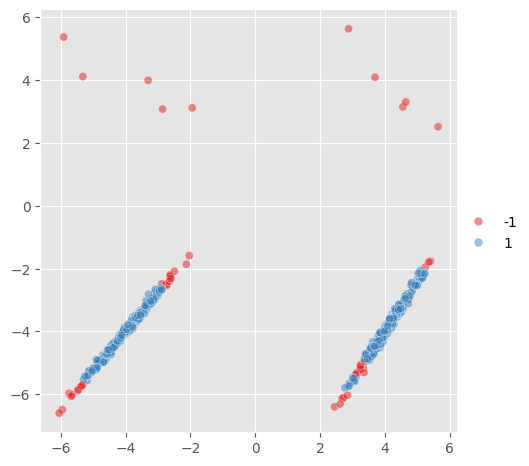

In [14]:
sns.relplot(x=X[:,0],y=X[:,1],hue=ypred,palette="Set1",alpha=0.5)

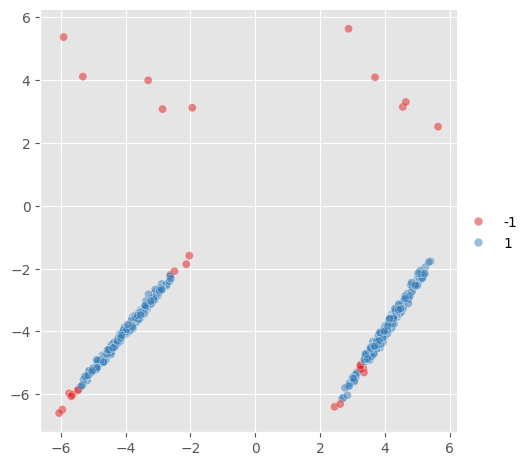

In [15]:
sns.relplot(x=X[:,0],y=X[:,1],hue=ypred2,palette="Set1",alpha=0.5)